In [223]:
%matplotlib inline
import pandas as pd
import matplotlib as plt

In [249]:
##1. csv 파일 불러오기 (convenient_store.csv)
conv= pd.read_csv('convenient_store.csv')
conv.head(5)

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25


In [250]:
##2. 전체 컬럼 정보, null 값 유무 확인
conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         177 non-null    object
 1   company      177 non-null    object
 2   hourly_wage  177 non-null    int64 
 3   area1        177 non-null    object
 4   area2        177 non-null    object
 5   outlier      177 non-null    int64 
 6   name         177 non-null    object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


In [226]:
##3. 개수, 평균, 편차, 최소, 최대값 
conv.describe()

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


In [254]:
##4. 지역에 대한 통계, 개수, 유니크한 정보, 제일 빈도가 높은 지역
# conv.area
conv['area'].describe()

count         177
unique        117
top       강남구 논현동
freq            7
Name: area, dtype: object

In [258]:
##5. 시간 당 급여가 6500원 이상인 지역의 편의점 정보 출력 (상위 10개만)
# conv[conv['hourly_wage']>=6500].head(10)
high_wage=conv[conv.hourly_wage>=6500]
high_wage.head(10)

,area,company,hourly_wage,area1,area2,outlier,name
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11
53,구로구 구로4동,세븐일레븐 구로리공원점,6500,구로구,구로4동,0,7/11
60,도봉구 창동,세븐일레븐,6500,도봉구,창동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11
89,성동구 사근동,세븐일레븐 한양대학교병원점,6500,성동구,사근동,0,7/11
135,중구 명동2가,세븐일레븐,6690,중구,명동2가,0,7/11
137,중구 북창동,세븐일레븐 북창점,6500,중구,북창동,0,7/11
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU


In [261]:
##6. 시간 당 급여가 높은 순서로 정렬 (sort_value() 함수 사용, 상위 10개만 출력)
# conv.sort_values(by='hourly_wage',ascending=False).head(10)
high_wage.sort_values(by='hourly_wage',ascending=0).head(10)

,area,company,hourly_wage,area1,area2,outlier,name
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
173,용산구 이태원동,CU 이태원프리덤점,7500,용산구,이태원동,0,CU
160,서대문구 신촌동,BGF Retail CU 신촌세브란스병원점,6900,서대문구,신촌동,0,CU
135,중구 명동2가,세븐일레븐,6690,중구,명동2가,0,7/11
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11
172,용산구 한남동,CU 한남리첸시아점,6600,용산구,한남동,0,CU
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11
53,구로구 구로4동,세븐일레븐 구로리공원점,6500,구로구,구로4동,0,7/11
60,도봉구 창동,세븐일레븐,6500,도봉구,창동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11


In [264]:
##7. 영등포구에서 시간 당 급여가 6000원 이상인 편의점 검색
# conv[(conv['area1']=='영등포구')&(conv['hourly_wage']>=6000)]
y_high_wage = conv[(conv.hourly_wage >= 6000) &(conv.area1 == '영등포구')]
y_high_wage


,area,company,hourly_wage,area1,area2,outlier,name
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25
106,영등포구 여의도동,세븐일레븐 여의역점,6000,영등포구,여의도동,0,7/11
107,영등포구 영등포동,세븐일레븐 영등포 2호점,6200,영등포구,영등포동,0,7/11


In [265]:
##8. CU 편의점만 출력 (상위 10개만)
# conv[conv['name']=='CU'].head(10)
cu=conv[conv.company.str.contains('CU')]
cu.head(10)

,area,company,hourly_wage,area1,area2,outlier,name
141,강남구 논현동,CU 논현힐탑점,5600,강남구,논현동,0,CU
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU
143,강남구 신사동,CU 로데오점,6100,강남구,신사동,0,CU
144,강남구 대치4동,CU 대치본점,6000,강남구,대치4동,0,CU
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU
146,강북구 수유3동,CU수유중앙점,5600,강북구,수유3동,0,CU
147,강서구 방화동,CU방화오피스점,6000,강서구,방화동,0,CU
148,관악구 신원동,CU신림인석점,5580,관악구,신원동,0,CU
149,관악구 봉천동,CU관악상상점,5580,관악구,봉천동,0,CU
150,구로구 구로동,CU편의점(고대구로병원1호점),5580,구로구,구로동,0,CU


In [267]:
##9. 지역 컬럼(location)을 추가한 다음, in Seoul 이라는 값 저장, 상위 5개 출력
# conv.insert(3,'location','in Seoul')
# conv.head(5)

conv['locattion'] = 'in Seoul'
conv.head(5)

,area,company,hourly_wage,area1,area2,outlier,name,locattion
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in Seoul
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in Seoul
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in Seoul
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in Seoul
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in Seoul


In [268]:
##10. 6000원 이상 컬럼 추가(more_than_6000) -> True, False 값 저장 (상위 20개 출력)
    
# conv.insert(7,'more_than_6000','')
# if 'hourly'
# conv.head(20)
conv['more_than_6000'] = conv.hourly_wage> 6000
conv.head(20)

,area,company,hourly_wage,area1,area2,outlier,name,locattion,more_than_6000
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in Seoul,False
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in Seoul,False
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in Seoul,False
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in Seoul,False
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in Seoul,False
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25,in Seoul,False
6,구로구 구로동,gs25구로동양점,5580,구로구,구로동,0,gs25,in Seoul,False
7,동대문구 장안동,gs25장안중앙점,5600,동대문구,장안동,0,gs25,in Seoul,False
8,마포구 서교동,gs25 홍대아트점,5600,마포구,서교동,0,gs25,in Seoul,False
9,성동구 금호동4,gs25 서울숲푸르지오점,6000,성동구,금호동4,0,gs25,in Seoul,False


In [271]:
##11. more_than_6000 컬럼에서 True인 데이터들의 평균, 개수, 편차 등의 정보 출력
conv[conv.more_than_6000 ==True].describe()

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


In [272]:
##12. more_than_6000 이름의 함수를 생성하고, 
# 6000원이상인 경우 A group, 아니면 B group을 반환하는 함수 생성

def more_than_6000(x:int)-> int:
    if x >=6000:
        return 'A group'
    else:
        return 'B group'


In [275]:
##13. more_than_6000_f 컬럼 생성하고 more_than_6000 함수의 결과를 저장
conv['more_than_6000_f'] = conv.hourly_wage.map(lambda x: more_than_6000(x))

In [276]:
##14. 지금까지의 결과 상위 10개를 출력
conv.head(10)

,area,company,hourly_wage,area1,area2,outlier,name,locattion,more_than_6000,more_than_6000_f
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in Seoul,False,B group
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in Seoul,False,B group
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in Seoul,False,B group
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in Seoul,False,B group
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in Seoul,False,B group
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25,in Seoul,False,A group
6,구로구 구로동,gs25구로동양점,5580,구로구,구로동,0,gs25,in Seoul,False,B group
7,동대문구 장안동,gs25장안중앙점,5600,동대문구,장안동,0,gs25,in Seoul,False,B group
8,마포구 서교동,gs25 홍대아트점,5600,마포구,서교동,0,gs25,in Seoul,False,B group
9,성동구 금호동4,gs25 서울숲푸르지오점,6000,성동구,금호동4,0,gs25,in Seoul,False,A group


In [279]:
##15-1. more_than_6000가 True인 데이터의 지역과 시간당 급여를 가진 새로운 데이터프레임 생성(data2)
conv2 = conv[conv.more_than_6000 == True][['area1','hourly_wage']]
##15-2. data2 데이터를 시간당 급여 순으로 정렬 (높은순)
conv2.sort_values(by='hourly_wage',ascending=0)

,area1,hourly_wage
173,용산구,7500
29,강남구,7500
160,서대문구,6900
135,중구,6690
37,강서구,6600
172,용산구,6600
30,강남구,6500
53,구로구,6500
60,도봉구,6500
161,서대문구,6500


In [282]:
##16. data2를 darta2.csv 파일로 저장
conv2.to_csv('data2.csv',index=False)

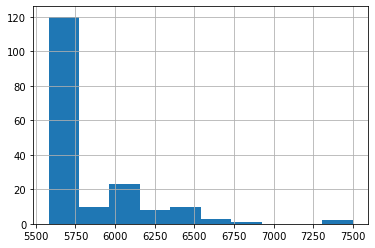

In [285]:
##17. 시간당 급여를 histogram 으로 표시 (matplotlib hist() 사용)
conv.hourly_wage.hist(bins=10)
plt.pyplot.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2265f5de430>,
 'caps': [<matplotlib.lines.Line2D at 0x2265f5dea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2265f5de0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x226605ba0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226605ba400>],
 'means': []}

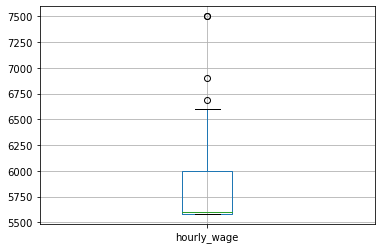

In [286]:
##18. 시간당 급여를 box 차트로 표시 
conv.boxplot(column='hourly_wage',return_type='dict')

<AxesSubplot:title={'center':'hourly_wage'}, xlabel='name'>

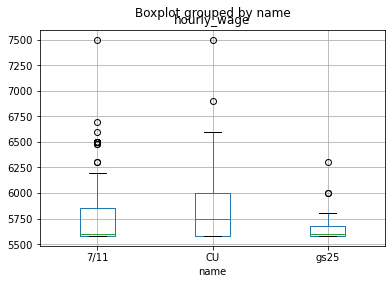

In [287]:
##19. 시간당 급여를 box 차트로 표시(이름순으로)
conv.boxplot(column='hourly_wage',by='name')

<AxesSubplot:title={'center':'hourly_wage'}, xlabel='area1'>

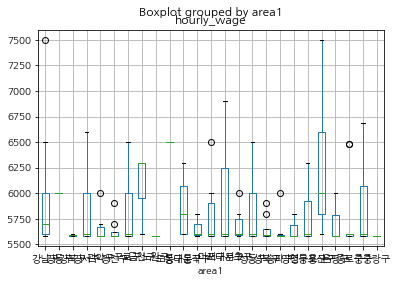

In [304]:
##19. 시간당 급여를 box 차트로 표시(지역순으로)
conv.boxplot(column='hourly_wage',by='area1')

#Font manager

In [293]:
import matplotlib.font_manager as fm

In [296]:
font_list = [(f.name,f.fname)for f in fm.fontManager.ttflist if 'Gothic' in f.name]

In [297]:
print (font_list)

[('Franklin Gothic Medium', 'C:\\WINDOWS\\Fonts\\framdit.ttf'), ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothic.ttf'), ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHIC.TTF'), ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'), ('MS Gothic', 'C:\\WINDOWS\\Fonts\\msgothic.ttc'), ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICBI.TTF'), ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicBold.ttf'), ('1HoonGothicgulim', 'C:\\WINDOWS\\Fonts\\HoonGothicgulimR.ttf'), ('HYGothic-Medium', 'C:\\WINDOWS\\Fonts\\H2GTRM.TTF'), ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicUltraLight.ttf'), ('Franklin Gothic Demi Cond', 'C:\\Windows\\Fonts\\FRADMCN.TTF'), ('Franklin Gothic Medium Cond', 'C:\\Windows\\Fonts\\FRAMDCN.TTF'), ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicBold.ttf'), ('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADM.TTF'), ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'), ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF')

In [303]:
#20. 한글 표시되게 matplotlib 지정

font_name= fm.FontProperties(fname= 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf').get_name()
print(font_name)
plt.rc('font',family=font_name)

NanumGothic


<AxesSubplot:title={'center':'hourly_wage'}, xlabel='area1'>

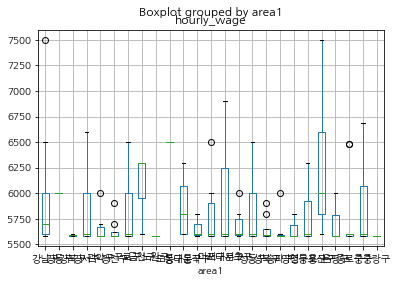

In [312]:
##21. 시간당 급여를 box 차트로 표시(지역순으로) <- 다시 실행

conv.boxplot(column='hourly_wage',by='area1')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, '강남구'),
  Text(2, 0, '강동구'),
  Text(3, 0, '강북구'),
  Text(4, 0, '강서구'),
  Text(5, 0, '관악구'),
  Text(6, 0, '광진구'),
  Text(7, 0, '구로구'),
  Text(8, 0, '금천구'),
  Text(9, 0, '노원구'),
  Text(10, 0, '도봉구'),
  Text(11, 0, '동대문구'),
  Text(12, 0, '동작구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '서대문구'),
  Text(15, 0, '서초구'),
  Text(16, 0, '성동구'),
  Text(17, 0, '성북구'),
  Text(18, 0, '송파구'),
  Text(19, 0, '양천구'),
  Text(20, 0, '영등포구'),
  Text(21, 0, '용산구'),
  Text(22, 0, '은평구'),
  Text(23, 0, '종로구'),
  Text(24, 0, '중구'),
  Text(25, 0, '중랑구')])

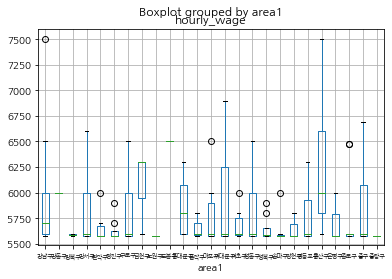

In [311]:
##22-1. 지역구별 box 차트(플롯) 
conv.boxplot(column= 'hourly_wage',by='area1')
plt.pyplot.xticks(fontsize=6)
##22-2. 폰트 사이즈 6



In [247]:
##23-1. 지역구별 box 차트(플롯), 지역구가 세로로 표시
##23-2. 폰트 사이즈 6

(array([5250., 5500., 5750., 6000., 6250., 6500., 6750., 7000., 7250.,
        7500., 7750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

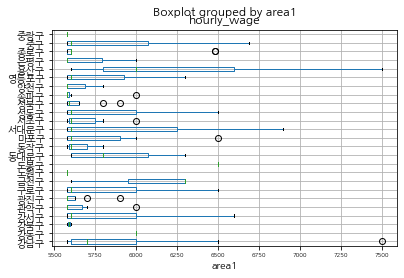

In [310]:
conv.boxplot(column= 'hourly_wage',by='area1',vert=False)
plt.pyplot.xticks(fontsize=6)